In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import tensorflow as tf
from tqdm import tqdm
from glob import glob

import librosa
import librosa.display as dsp
import IPython.display as ipd

warnings.filterwarnings(action='ignore')

In [3]:
root = '/workspace/EmotionShortForm'
os.chdir(root)

## 시드 고정

In [4]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.set_random_seed(seed)

seed_everything(42)

## csv 파일로딩

In [6]:
audio_data_path = 'data_audio'
audio_train_data_path = os.path.join(audio_data_path,'train')
audio_test_data_path = os.path.join(audio_data_path,'test')
train = pd.read_csv(os.path.join(audio_data_path,'train.csv'))
test = pd.read_csv(os.path.join(audio_data_path,'test.csv'))

In [7]:
print(train.shape)
print(test.shape)

(10769, 6)
(2693, 6)


In [8]:
train.head()

,Unnamed: 0,SegmentId,time,Emotion,Valence,Arousal
0,11164,Sess26_script04_User052F_010,7.785990,neutral,3.0,3.5
1,13031,Sess24_script03_User047F_009,12.188990,happy,3.4,3.6
2,1147,Sess09_script01_User018M_030,4.147000,neutral,2.6,3.1
3,6435,Sess14_script02_User028M_002,1.556999,neutral,3.6,3.1
4,7053,Sess32_script01_User064F_049,5.443000,neutral,3.0,3.5


## 오디오 데이터 불러오기


In [9]:
sr = 20000 # 사운드 튜닝 하이퍼파라미터

In [10]:
for i in os.listdir(audio_train_data_path)[:3]:
  print(f'{i}')
  data, sample_rate = librosa.load(os.path.join(audio_train_data_path,i), sr=sr)
  print('sample_rate:', sample_rate, ', audio shape:', data.shape)
  print('length:', data.shape[0]/float(sample_rate), 'secs')
  print('\n')

Sess02_script02_User004M_012.wav
sample_rate: 20000 , audio shape: (437100,)
length: 21.855 secs


Sess11_script04_User022M_011.wav
sample_rate: 20000 , audio shape: (140600,)
length: 7.03 secs


Sess37_script02_User073F_012.wav
sample_rate: 20000 , audio shape: (349720,)
length: 17.486 secs




In [11]:
train["Emotion"].unique()

array(['neutral', 'happy', 'angry;neutral', 'happy;neutral',
       'happy;surprise', 'surprise', 'angry', 'neutral;sad', 'sad',
       'surprise;neutral', 'angry;neutral;disqust', 'happy;fear',
       'disqust', 'neutral;fear', 'neutral;disqust', 'fear',
       'happy;surprise;neutral', 'angry;disqust', 'happy;angry;neutral',
       'happy;neutral;fear', 'happy;sad', 'happy;neutral;disqust'],
      dtype=object)

In [12]:
train.head()

,Unnamed: 0,SegmentId,time,Emotion,Valence,Arousal
0,11164,Sess26_script04_User052F_010,7.785990,neutral,3.0,3.5
1,13031,Sess24_script03_User047F_009,12.188990,happy,3.4,3.6
2,1147,Sess09_script01_User018M_030,4.147000,neutral,2.6,3.1
3,6435,Sess14_script02_User028M_002,1.556999,neutral,3.6,3.1
4,7053,Sess32_script01_User064F_049,5.443000,neutral,3.0,3.5


## EDA

### train data의 감정 빈도 Bar Plot

{'neutral': 8880, 'happy': 962, 'angry;neutral': 68, 'happy;neutral': 275, 'happy;surprise': 5, 'surprise': 122, 'angry': 112, 'neutral;sad': 59, 'sad': 95, 'surprise;neutral': 47, 'angry;neutral;disqust': 2, 'happy;fear': 1, 'disqust': 46, 'neutral;fear': 16, 'neutral;disqust': 35, 'fear': 37, 'happy;surprise;neutral': 1, 'angry;disqust': 2, 'happy;angry;neutral': 1, 'happy;neutral;fear': 1, 'happy;sad': 1, 'happy;neutral;disqust': 1}


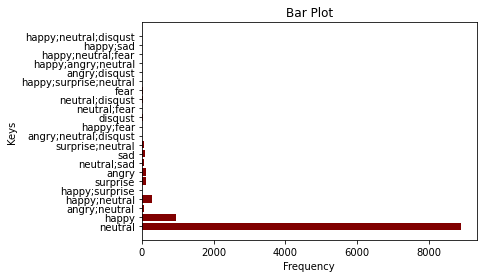

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 빈도 계산
data = train["Emotion"]

counts = {}
for d in data:
    if d in counts:
        counts[d] += 1
    else:
        counts[d] = 1


print(counts)
# barplot 그리기
plt.barh(list(counts.keys()), list(counts.values()), color='maroon')

# 그래프 제목과 레이블 추가
plt.title('Bar Plot')
plt.xlabel('Frequency')
plt.ylabel('Keys')

plt.show()

+  "neutral"을 고려 x 

{'happy': 962, 'angry;neutral': 68, 'happy;neutral': 275, 'happy;surprise': 5, 'surprise': 122, 'angry': 112, 'neutral;sad': 59, 'sad': 95, 'surprise;neutral': 47, 'angry;neutral;disqust': 2, 'happy;fear': 1, 'disqust': 46, 'neutral;fear': 16, 'neutral;disqust': 35, 'fear': 37, 'happy;surprise;neutral': 1, 'angry;disqust': 2, 'happy;angry;neutral': 1, 'happy;neutral;fear': 1, 'happy;sad': 1, 'happy;neutral;disqust': 1}


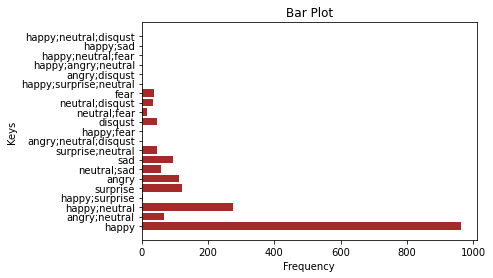

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 빈도 계산
data = train["Emotion"]

counts = {}
for d in data:
    if d in counts:
        counts[d] += 1
    else:
        counts[d] = 1
counts.pop("neutral")

print(counts)
# barplot 그리기
plt.barh(list(counts.keys()), list(counts.values()), color='brown')

# 그래프 제목과 레이블 추가
plt.title('Bar Plot')
plt.xlabel('Frequency')
plt.ylabel('Keys')

plt.show()



+ 중복되는 감정 데이터셋에 대해 "neutral" 감정 제거

happy angry;neutral happy;neutral happy;surprise surprise angry neutral;sad sad surprise;neutral angry;neutral;disqust happy;fear disqust neutral;fear neutral;disqust fear happy;surprise;neutral angry;disqust happy;angry;neutral happy;neutral;fear happy;sad happy;neutral;disqust
['happy', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'disqust']
{'happy': 1248, 'neutral': 9386, 'angry': 185, 'fear': 55, 'surprise': 175, 'sad': 155, 'disqust': 86}


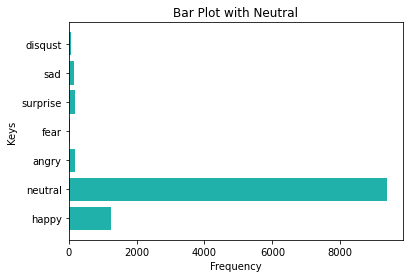

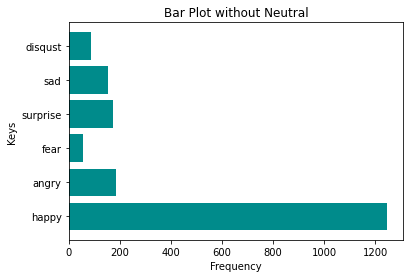

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 빈도 계산
data = train["Emotion"]

counts = {}
for d in data:
    if d in counts:
        counts[d] += 1
    else:
        counts[d] = 1
counts.pop("neutral")
key = list(counts.keys())
str_key = " ".join(key)
print(str_key)
str_key1= str_key.split(";") # 모든 emotion string 합친 뒤 세미콜론 기준 split

for i in range(len(str_key1)):
  str_key1[i]=str_key1[i].split(" ") # 공백 기준 나누기
str_key = sum(str_key1,[])
# 중복 값 제거
str_key = list(set(str_key))
print(str_key)


# 빈도 계산
data = train["Emotion"]

counts = dict.fromkeys(str_key,0)
for i in range(len(data)):
  for j in str_key:
    if j in data[i]:
      # print(data[i])
      counts[j] += 1
    else:
      continue
     
print(counts)


# neutral 제거 전 barplot 
plt.barh(list(counts.keys()), list(counts.values()), color='lightseagreen')

# 그래프 제목과 레이블 추가
plt.title('Bar Plot with Neutral')
plt.xlabel('Frequency')
plt.ylabel('Keys')

plt.show()

# neutral 제거 후 barplot
counts.pop("neutral")

plt.barh(list(counts.keys()), list(counts.values()), color='darkcyan')

# 그래프 제목과 레이블 추가
plt.title('Bar Plot without Neutral')
plt.xlabel('Frequency')
plt.ylabel('Keys')

plt.show()


## train, test 셋 분리

In [33]:
!pip install --upgrade --quiet jupyter_client ipywidgets
!/usr/bin/python -m pip install --upgrade pip

In [34]:
!pip install ipywidgets 

In [35]:
!pip3 install --upgrade pip

In [50]:
# librosa feature extraction
def input_preprocessing(audio, y, sr):
  # chroma
  chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
  chroma_stft_mean =  chromagram.mean()
  chroma_stft_var = chromagram.var()

  # rms
  rms = librosa.feature.rms(y,sr)
  rms_mean = rms.mean()
  rms_var = rms.var()

  # spectral_centroid 
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)
  spectral_centroid_mean =  spectral_centroids.mean()
  spectral_centroid_var = spectral_centroids.var()
  
  # spectral_bandwidth
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y,sr=sr)
  spectral_bandwidth_mean =  spectral_bandwidth.mean()
  spectral_bandwidth_var = spectral_bandwidth.var()

  # spectral_rolloff
  spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)
  rolloff_mean = spectral_rolloff.mean()
  rolloff_var = spectral_rolloff.var()

  # zero_crossing_rate
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
  zero_crossing_rate_mean = zero_crossing_rate.mean()
  zero_crossing_rate_var = zero_crossing_rate.var()

  # harmony
  y_harm, y_perc = librosa.effects.hpss(y)

  harmony_mean = y_harm.mean()
  harmony_var = y_harm.var()

  # perceptr 
  perceptr_mean = y_perc.mean()
  perceptr_var = y_perc.var()

  # tempo
  tempo, _ = librosa.beat.beat_track(y, sr=sr)

  
  # mfccs
  mfccs_mean_lst = []
  mfccs_var_lst = []

  for j in range(20):
    mfccs = librosa.feature.mfcc(y,sr=sr)[j]
    mfccs_mean_lst.append(mfccs.mean())
    mfccs_var_lst.append(mfccs.var())

  # Make DataFrame

  data = {'SegmentId':[audio], 'chroma_stft_mean':[chroma_stft_mean], 'chroma_stft_var':[chroma_stft_var], 'rms_mean':[rms_mean],
        'rms_var':[rms_var], 'spectral_centroid_mean':[spectral_centroid_mean], 'spectral_centroid_var':[spectral_centroid_var],
        'spectral_bandwidth_mean':[spectral_bandwidth_mean], 'spectral_bandwidth_var':[spectral_bandwidth_var], 'rolloff_mean':[rolloff_mean],
        'rolloff_var':[rolloff_var], 'zero_crossing_rate_mean':[zero_crossing_rate_mean], 'zero_crossing_rate_var':[zero_crossing_rate_var],
        'harmony_mean':[harmony_mean], 'harmony_var':[harmony_var], 'perceptr_mean':[perceptr_mean], 'perceptr_var':[perceptr_var], 'tempo':[tempo],
        'mfcc1_mean':[mfccs_mean_lst[0]], 'mfcc1_var':[mfccs_var_lst[0]], 'mfcc2_mean':[mfccs_mean_lst[1]], 'mfcc2_var':[mfccs_var_lst[1]], 'mfcc3_mean':[mfccs_mean_lst[2]],
        'mfcc3_var':[mfccs_var_lst[2]], 'mfcc4_mean':[mfccs_mean_lst[3]], 'mfcc4_var':[mfccs_var_lst[3]], 'mfcc5_mean':[mfccs_mean_lst[4]], 'mfcc5_var':[mfccs_mean_lst[4]],
        'mfcc6_mean':[mfccs_mean_lst[5]], 'mfcc6_var':[mfccs_mean_lst[5]], 'mfcc7_mean':[mfccs_mean_lst[6]], 'mfcc7_var':[mfccs_mean_lst[6]], 'mfcc8_mean':[mfccs_mean_lst[7]],
        'mfcc8_var':[mfccs_mean_lst[7]], 'mfcc9_mean':[mfccs_mean_lst[8]], 'mfcc9_var':[mfccs_mean_lst[8]], 'mfcc10_mean':[mfccs_mean_lst[9]], 'mfcc10_var':[mfccs_mean_lst[9]],
        'mfcc11_mean':[mfccs_mean_lst[10]], 'mfcc11_var':[mfccs_mean_lst[10]], 'mfcc12_mean':[mfccs_mean_lst[11]], 'mfcc12_var':[mfccs_mean_lst[11]], 'mfcc13_mean':[mfccs_mean_lst[12]],
        'mfcc13_var':[mfccs_mean_lst[12]], 'mfcc14_mean':[mfccs_mean_lst[13]], 'mfcc14_var':[mfccs_mean_lst[13]], 'mfcc15_mean':[mfccs_mean_lst[14]], 'mfcc15_var':[mfccs_mean_lst[14]],
        'mfcc16_mean':[mfccs_mean_lst[15]], 'mfcc16_var':[mfccs_mean_lst[15]], 'mfcc17_mean':[mfccs_mean_lst[16]], 'mfcc17_var':[mfccs_mean_lst[16]], 'mfcc18_mean':[mfccs_mean_lst[17]],
        'mfcc18_var':[mfccs_mean_lst[17]], 'mfcc19_mean':[mfccs_mean_lst[18]], 'mfcc19_var':[mfccs_mean_lst[18]], 'mfcc20_mean':[mfccs_mean_lst[19]], 'mfcc20_var':[mfccs_mean_lst[19]]}

  append_set = pd.DataFrame(data=data)
  
  return append_set

In [36]:
from tqdm.notebook import tqdm

train_file_names = train["SegmentId"].to_numpy()
test_file_names = test["SegmentId"].to_numpy()
target = train["Emotion"].to_numpy()
def load_audio(file_names, target, path):   
  audios = []
  for audio in tqdm(file_names):
    # librosa를 이용하여 데이터 로드
#     an_audio, y = librosa.load(path+audio+".wav", sr=sr)
#     audio_array = np.array(an_audio)
#     audios.append(audio_array)
#     audios = np.array(audios)
      audio_array = {SegmentId}
      y, sr = librosa.load(path+audio+".wav", sr=sr)
      audio_array =  input_preprocessing(audio, y, sr)
      audios = array.append(audio_array)
      targets = target.copy()
  audios_2 =  pd.DataFrame(audios)
  
  return audios_2, targets

In [37]:
audio_train, target_train = load_audio(train_file_names, target, path='/workspace/EmotionShortForm/audio_data/train/')

In [ ]:
audio_test, _ = load_audio(test_file_names, np.array([None]), path='/workspace/EmotionShortForm/audio_data/test/')

In [45]:
audio_test

array([array([ 0.0014604 ,  0.00151886,  0.00136419, ..., -0.00223476,
       -0.00231414, -0.00130135], dtype=float32),
       array([0.00056384, 0.0009567 , 0.00077958, ..., 0.00094626, 0.00141279,
       0.00125348], dtype=float32),
       array([ 0.00043374,  0.00049454,  0.00040615, ..., -0.00207899,
       -0.00241257, -0.00166413], dtype=float32),
       ...,
       array([ 0.00675598,  0.00761465,  0.00646641, ..., -0.00045254,
       -0.00020506, -0.00026221], dtype=float32),
       array([ 0.00046045,  0.000386  ,  0.00035168, ..., -0.00430046,
        0.0050976 ,  0.0069371 ], dtype=float32),
       array([-0.02013084, -0.02221882, -0.01872657, ..., -0.01763736,
       -0.02140505, -0.01545861], dtype=float32)], dtype=object)

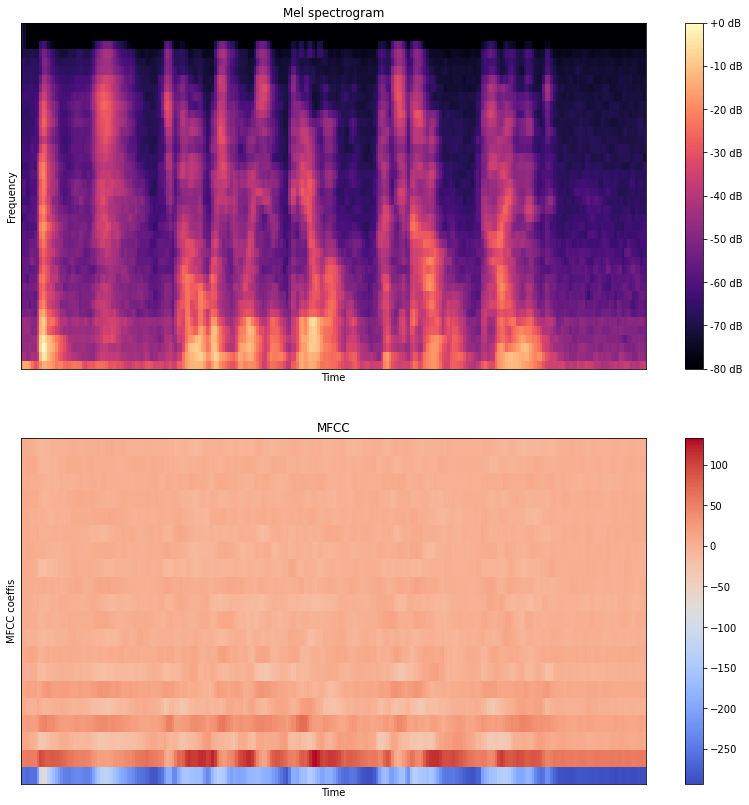

In [46]:
plt.figure(figsize=(14,14))
ax = plt.subplot(2, 1, 1)


ax = plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(audio_train[15], sr=sr, n_mels=40)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr)
plt.title('Mel spectrogram')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')

ax = plt.subplot(2, 1, 2)
mfcc = librosa.feature.mfcc(audio_train[15], sr=sr, n_mels=40)
librosa.display.specshow(mfcc, sr=sr)
plt.title('MFCC')
plt.xlabel("Time")
plt.ylabel("MFCC coeffis")
plt.colorbar()

In [ ]:
def random_pad(mels, pad_size, mfcc=True):

  pad_width = pad_size - mels.shape[1]
  rand = np.random.rand()
  left = int(pad_width * rand)
  right = pad_width - left
  
  if mfcc:
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
  else:
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')


  return mels